### Data import, cleansing and exploration

In [375]:
import thinkstats2
import nsfg
import probability
import thinkplot

import pandas as pd
import numpy as np
import math
import os
import random
import scipy.stats

%matplotlib inline

ImportError: No module named EvalNormalCdf

In [334]:
os.getcwd()

'/Users/THoshino/Desktop/METIS/METISGH/PREWORK/dsp/statistics'

In [335]:
def ReadFemPreg(dct_file = '2002FemPreg.dct',
               dat_file='2002FemPreg.dat.gz'):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df

In [336]:
df = nsfg.ReadFemPreg()
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [337]:
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [338]:
df.outcome.value_counts(sort=False)

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Relevant variables:  

caseid  
prglngth  
outcome  
pregordr  
birthord  
birthwgt_lb  
birthwgt_oz  
agepreg  
finalwgt  

In [339]:
bw_count = df['birthwgt_lb'].value_counts(sort=False)
bw_count

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

<Container object of 16 artists>

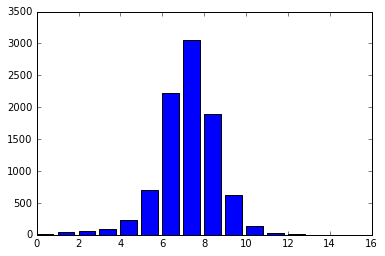

In [340]:
index = bw_count.index.values.tolist()
values = bw_count.values.tolist()

plt.bar(index, values)

In [341]:
live = preg[preg['outcome'] == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb')
print len(live)
print len(hist)

9148
16


In [342]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [343]:
hist

Hist({0.0: 8, 1.0: 40, 2.0: 53, 3.0: 98, 4.0: 229, 5.0: 697, 6.0: 2223, 7.0: 3049, 8.0: 1889, 9.0: 623, 10.0: 132, 11.0: 26, 12.0: 10, 13.0: 3, 14.0: 3, 15.0: 1})

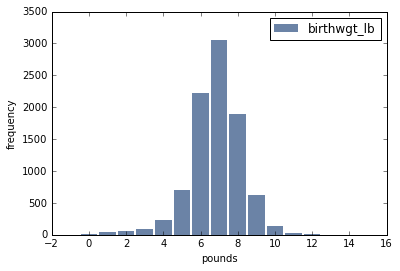

In [344]:
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds',ylabel='frequency')

In [345]:
for weeks, freq in hist.Smallest(10):
    print (weeks, freq)

(0.0, 8)
(1.0, 40)
(2.0, 53)
(3.0, 98)
(4.0, 229)
(5.0, 697)
(6.0, 2223)
(7.0, 3049)
(8.0, 1889)
(9.0, 623)


In [346]:
firsts = live[live['birthord'] == 1]
print len(firsts)
firsts

4413


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125
11,14,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,7.0000
15,15,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.6875
17,18,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2957.257457,3404.403067,4153.371741,2,14,NaN,6.3125
19,21,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.7500
21,23,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,6210.373020,8120.841310,13533.382043,2,64,NaN,5.5625


In [347]:
others = live[live['birthord'] != 1]
print len(others)
others

4735


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250
12,14,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,4.0000
16,15,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.5000
20,21,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.1875
24,24,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3409.573258,4068.628645,7424.840414,1,27,NaN,7.3750


In [348]:
firsts_hist = thinkstats2.Hist(firsts['prglngth'])
other_hist = thinkstats2.Hist(others['prglngth'])

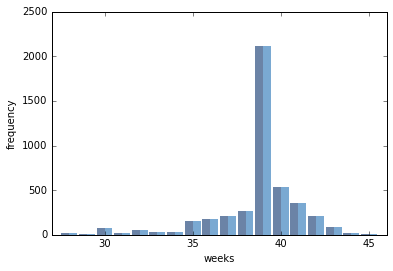

In [349]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_hist, align='right', width=width)
thinkplot.Hist(firsts_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

### Q1. Think Stats Chapter 2 Exercise 4 (effect size of Cohen's d)

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [350]:
def CohenEffect(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [351]:
prglngth_firsts = firsts['prglngth']
prglngth_others = others['prglngth']

In [352]:
CohenEffect(prglngth_firsts,prglngth_others)

0.028879044654449883

In [353]:
weight_firsts = firsts['totalwgt_lb']
weight_others = others['totalwgt_lb']

In [354]:
CohenEffect(weight_firsts,weight_others)

-0.088672927072602

In [355]:
## Working for Q2

In [356]:
first_pmf = thinkstats2.Pmf(prglngth_firsts)
other_pmf = thinkstats2.Pmf(prglngth_others)

In [357]:
first_pmf

Pmf({0: 0.00022660321776569228, 17: 0.00022660321776569228, 20: 0.00022660321776569228, 21: 0.00022660321776569228, 22: 0.00067980965329707678, 23: 0.00022660321776569228, 24: 0.0015862225243598459, 25: 0.00022660321776569228, 26: 0.0036256514842510764, 27: 0.00022660321776569228, 28: 0.0054384772263766142, 29: 0.0020394289598912306, 30: 0.016542034896895538, 31: 0.0033990482664853841, 32: 0.012463176977113076, 33: 0.0063448900974393836, 34: 0.0065714933152050759, 35: 0.036029911624745073, 36: 0.038975753455699071, 37: 0.047133469295263991, 38: 0.0616360752322683, 39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.081577158395649219, 42: 0.046453659641966918, 43: 0.019714479945615229, 44: 0.0052118740086109228, 45: 0.0013596193065941536, 46: 0.00022660321776569228, 47: 0.00022660321776569228, 48: 0.00067980965329707678})

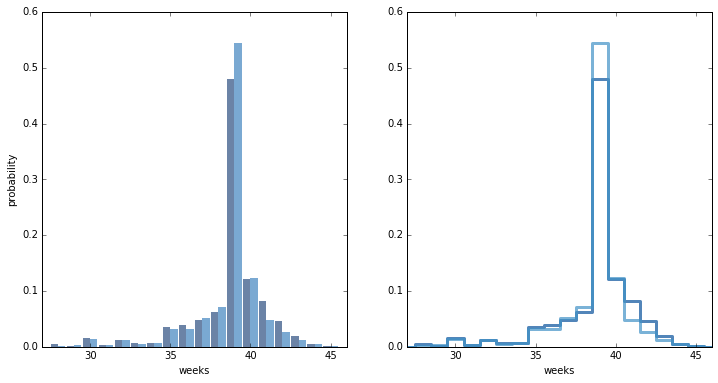

In [358]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',
ylabel='probability',
axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',
axis=[27, 46, 0, 0.6])

In [359]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

diffs

[0.39285388686732675,
 0.75079604250760523,
 -0.50312614333526895,
 -0.91136607761794219,
 -6.5628168287465929,
 -0.10327555310208347,
 3.363629250335777,
 2.0476890898566706,
 0.68316921948232534,
 0.035442944683689984,
 0.051484633932910605]

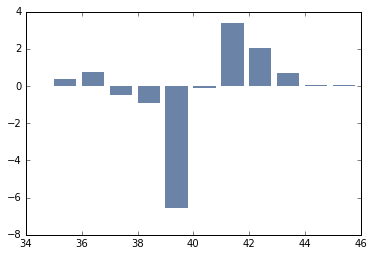

In [360]:
thinkplot.Bar(weeks, diffs)

In [361]:
# Working for Q2

In [362]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
pmf = thinkstats2.Pmf(d, label='actual')
print pmf.Mean()

23.6923076923


In [363]:
print pmf.Items()

[(32, 0.18461538461538463), (37, 0.12307692307692308), (7, 0.12307692307692308), (42, 0.046153846153846156), (12, 0.12307692307692308), (47, 0.03076923076923077), (17, 0.2153846153846154), (22, 0.06153846153846154), (27, 0.09230769230769231)]


In [364]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

BiasPmf(pmf, 'actual')

Pmf({32: 0.24935064935064938, 37: 0.1922077922077922, 7: 0.03636363636363637, 42: 0.08181818181818183, 12: 0.062337662337662345, 47: 0.061038961038961045, 17: 0.15454545454545457, 22: 0.05714285714285715, 27: 0.1051948051948052})

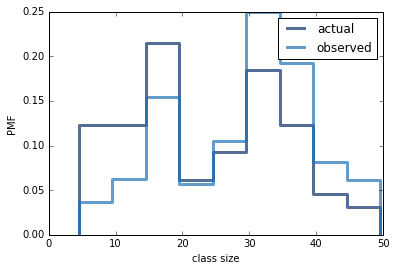

In [365]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

### Q2. Think Stats Chapter 3 Exercise 1 (actual vs. biased)

This problem presents a robust example of actual vs biased data. As a data scientist, it will be important to examine not only the data that is available, but also the data that may be missing but highly relevant. You will see how the absence of this relevant data will bias a dataset, its distribution, and ultimately, its statistical interpretation.

Exercise 3.1 Something like the class size paradox appears if you survey
children and ask how many children are in their family. Families with many
children are more likely to appear in your sample, and families with no
children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution
for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children
and asked them how many children under 18 (including themselves)
are in their household.
Plot the actual and biased distributions, and compute their means. As a
starting place, you can use chap03ex.ipynb.

In [264]:
def ReadFemResp(dct_file = '2002FemResp.dct',
               dat_file='2002FemResp.dat.gz'):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    return df

In [265]:
df1 = ReadFemResp()
actual_child = df1['numkdhh']
pmf1 = thinkstats2.Pmf(actual_child, label='actual')
print pmf1.Mean()

1.02420515504


2.40367910066


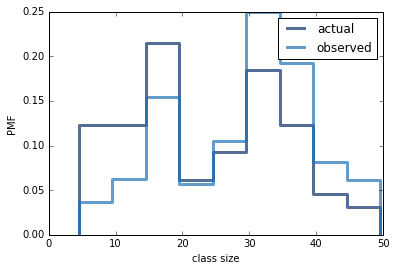

In [268]:
biased_pmf1 = BiasPmf(pmf1, label='observed')
print biased_pmf1.Mean()

thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

### Q3. Think Stats Chapter 4 Exercise 2 (random distribution)

This questions asks you to examine the function that produces random numbers. Is it really random? A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution. If you're not sure what pmf is, read more about it in Chapter 3.

Exercise 4.2 The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

In [276]:
l_random = []
for i in range(1000):
    l_random.append(random.random())
    
l_random

[0.798706790667787,
 0.5832416163268386,
 0.9584640785023962,
 0.0569716189471422,
 0.291454256366505,
 0.9871364942740841,
 0.7890876692755421,
 0.4598876852288978,
 0.6394946461522182,
 0.2574255037152223,
 0.7551050433893229,
 0.9106114004597623,
 0.16836100803806564,
 0.4794048587435876,
 0.09598797931489123,
 0.7153669538615948,
 0.26759160722377184,
 0.626407166973412,
 0.07546376416337475,
 0.4884853756984414,
 0.38297904270003413,
 0.2607897174168118,
 0.311360346896168,
 0.7328832518465788,
 0.009049079743286725,
 0.49648251377036745,
 0.6444993543490762,
 0.5822889945155526,
 0.13236283892320144,
 0.5580187899917541,
 0.8911197500938951,
 0.6254452247663279,
 0.8666559111058307,
 0.7694702501812832,
 0.8855955225525132,
 0.05675795606838763,
 0.6269339710171621,
 0.5245062152585082,
 0.15718944464732532,
 0.3445578952189027,
 0.697531913127643,
 0.12316272912965676,
 0.45687308758239575,
 0.6662294056019267,
 0.7674811178753187,
 0.7720902515361174,
 0.7465038706989348,
 0.50

In [300]:
pmf2 = thinkstats2.Pmf(l_random)

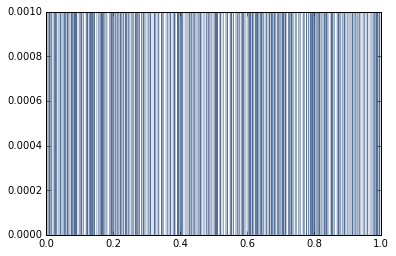

In [301]:
thinkplot.Pmf(pmf2, linewidth=0.1)
thinkplot.Show()

In [304]:
cdf2 = thinkstats2.Cdf(l_random)
cdf2

Cdf([ 0.00192016  0.00416345  0.00474704  0.00643982  0.0069921   0.00769183
  0.00904634  0.00904908  0.00928268  0.00946272  0.01062863  0.01077538
  0.01118175  0.01233242  0.01266802  0.01510548  0.01605071  0.01606132
  0.01609359  0.01686457  0.01803825  0.02115651  0.0219425   0.02399573
  0.02424807  0.02464694  0.02530831  0.02597609  0.02669687  0.02687678
  0.0269497   0.02873418  0.02924478  0.02981571  0.03094787  0.03137662
  0.03342424  0.03602184  0.03726327  0.03793766  0.03896636  0.04119494
  0.0415501   0.04156193  0.04229169  0.04337207  0.04411716  0.04614014
  0.04739635  0.04970738  0.05086908  0.05207014  0.05282671  0.05470296
  0.0551289   0.05525882  0.05567284  0.05675796  0.0569135   0.05697162
  0.05845609  0.06070609  0.0616387   0.06375027  0.06385652  0.06401499
  0.06451488  0.06460488  0.06611305  0.06665982  0.06669712  0.07002881
  0.07019754  0.07223673  0.07371341  0.07387175  0.07395639  0.07467616
  0.07546376  0.07554415  0.07628534  0.0775237

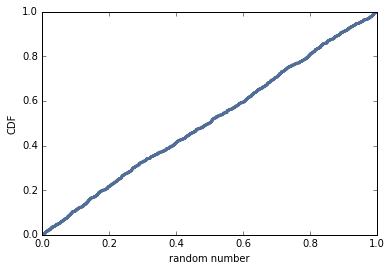

In [305]:
thinkplot.Cdf(cdf2)
thinkplot.Show(xlabel='random number', ylabel='CDF')

### Q4. Think Stats Chapter 5 Exercise 1 (normal distribution of blue men)

This is a classic example of hypothesis testing using the normal distribution. The effect size used here is the Z-statistic.

Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is
roughly normal with parameters m = 178 cm and s = 7.7 cm for men,
and m = 163 cm and s = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and
6’1” (see http://bluemancasting.com). What percentage of the U.S. male
population is in this range? Hint: use scipy.stats.norm.cdf.

In [374]:
scipy.stats.norm.cdf(0)

0.5

In [376]:
mean_height = 178.0
std_height = 7.7

In [377]:
distribution = scipy.stats.norm(loc=mean_height, scale=std_height)

In [393]:
def metric_convert(feet, inches):
    centimetres = inches * 2.54 / 100
    metres = feet * 0.3048
    measure = (metres + centimetres) * 100
    return measure

In [394]:
male1 = metric_convert(5,10)
male2 = metric_convert(6,1)
print male1
print male2

177.8
185.42


In [395]:
below_male1 = distribution.cdf(male1)
below_male2 = distribution.cdf(male2)
proportion = below_male2 - below_male1
proportion

0.34274683763147457